In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Importing Basic Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd


In [3]:
tf.config.run_functions_eagerly(True)

In [4]:
#Reading the Datasets
df=pd.read_csv('/content/gdrive/MyDrive/train.csv')
test_data=pd.read_csv('/content/gdrive/MyDrive/test.csv')

In [5]:
df.shape


(5250, 1201)

In [6]:
df.sample(10)

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
786,1,0.169474,-2.476358,-0.949854,-0.502623,-0.821486,-0.486267,-0.565750,1.109564,2.513141,...,2.745427,-1.473662,-0.978321,2.134376,0.064886,0.321780,0.184409,0.217003,-0.913699,-0.680156
3335,0,0.474419,-0.113313,0.488412,1.733844,0.572374,-0.379192,-1.596637,-0.868969,0.530393,...,1.789819,0.166559,1.188093,0.782278,0.698316,-1.750567,-0.924943,0.530393,-0.799001,-0.561109
514,0,-1.749588,-0.040031,0.817171,-1.076974,0.409713,-0.178440,0.445176,-0.728030,0.695594,...,-0.121197,0.759468,1.021320,-0.262521,0.266192,-0.724414,2.823658,0.849827,0.206259,0.541818
4778,0,0.991513,-0.583872,1.052105,1.112697,1.112697,-0.280913,1.076342,-1.032251,-1.807826,...,1.076342,0.615845,0.106874,1.064224,1.039987,-1.383684,-0.826239,1.076342,-1.553340,-1.117080
2777,0,1.180767,-0.089854,1.237790,-0.473307,1.226385,0.678972,-1.031162,-1.135561,-0.589982,...,-0.497705,0.737362,-1.843365,0.396836,0.479072,-2.252003,-0.085125,-1.218667,0.935574,-0.142147
4388,0,1.026874,-0.541431,0.948459,1.026874,1.026874,-0.494382,1.026874,-1.796075,0.932775,...,1.026874,-0.180721,0.101574,-0.353235,0.838677,-2.674326,-1.074655,1.011191,0.932775,-2.078370
3856,0,1.271477,0.213250,1.284227,1.207729,0.978234,0.480994,-0.768479,-0.475235,-0.449736,...,1.284227,-1.405966,0.238749,-1.240219,0.136751,-0.041745,-0.347738,1.284227,-0.908726,-0.424237
1159,0,-1.123127,-0.695765,0.237126,-1.183269,0.158651,-0.530502,0.676461,-0.770826,-0.954423,...,-2.369986,-1.785473,1.126078,-0.199772,-0.939673,-0.024669,-2.185132,-0.565934,0.081035,-0.354286
1495,0,1.805587,0.876869,0.205508,-0.110666,0.358262,0.351910,0.353190,1.211651,0.089564,...,-0.312798,-1.007265,-1.517746,0.168582,-2.282693,0.224540,1.602245,-1.612459,0.335077,0.532338
3573,0,0.958968,-0.018941,1.421493,1.421493,-1.155431,0.443583,-0.071801,-0.706121,0.707883,...,1.421493,-1.723676,0.773958,-1.710461,1.196838,-0.256811,0.152853,1.421493,-1.512236,0.258573


In [7]:
X=df.drop(columns=['labels'])

In [8]:
ids=test_data['id']

In [9]:
test_data=test_data.drop(columns=['id'])

In [10]:
X.shape

(5250, 1200)

In [11]:
X.isna().sum()

f_0       0
f_1       0
f_2       0
f_3       0
f_4       0
         ..
f_1195    0
f_1196    0
f_1197    0
f_1198    0
f_1199    0
Length: 1200, dtype: int64

In [12]:
#Creating the sequential model
model = Sequential()

model.add(Dense(64,activation='relu',kernel_initializer='he_normal',input_shape=(1200,)))
model.add(Dropout(0.4))#Adding DropOut Layers to prevent overfitting
model.add(BatchNormalization())#Applying Batch Normalization to improve performance

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                76864     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

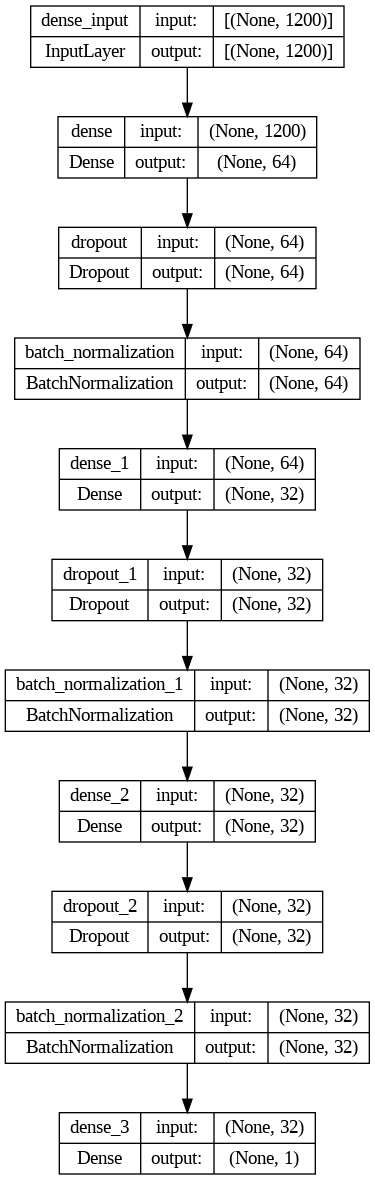

In [14]:
#Visualizing the structure of the model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
Y=df['labels']

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X,Y,epochs=10)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


165/165 [==============================] - 18s 84ms/step - loss: 0.6057 - accuracy: 0.6869
Epoch 2/10
165/165 [==============================] - 13s 82ms/step - loss: 0.4493 - accuracy: 0.7870
Epoch 3/10
165/165 [==============================] - 13s 81ms/step - loss: 0.3811 - accuracy: 0.8278
Epoch 4/10
165/165 [==============================] - 14s 86ms/step - loss: 0.3579 - accuracy: 0.8402
Epoch 5/10
165/165 [==============================] - 13s 78ms/step - loss: 0.3154 - accuracy: 0.8617
Epoch 6/10
165/165 [==============================] - 14s 84ms/step - loss: 0.2970 - accuracy: 0.8752
Epoch 7/10
165/165 [==============================] - 13s 79ms/step - loss: 0.2582 - accuracy: 0.8857
Epoch 8/10
165/165 [==============================] - 13s 79ms/step - loss: 0.2412 - accuracy: 0.9013
Epoch 9/10
165/165 [==============================] - 13s 80ms/step - loss: 0.2233 - accuracy: 0.9116
Epoch 10/10
165/165 [==============================] - 13s 79ms/step - loss: 0.2023 - accurac

In [18]:
Y_pred=model.predict(test_data)

14/71 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


71/71 [==============================] - 1s 8ms/step


In [19]:
def my_function(x):
  return 1 if x>0.5 else 0

In [20]:
Y_pred = np.array([my_function(xi) for xi in Y_pred])

In [21]:
Y_pred


array([0, 0, 1, ..., 1, 0, 1])

In [22]:
Y_pred=Y_pred.reshape(2250,1)

In [23]:
ids

0          1
1          2
2          3
3          4
4          5
        ... 
2245    2246
2246    2247
2247    2248
2248    2249
2249    2250
Name: id, Length: 2250, dtype: int64

In [24]:
labels = pd.DataFrame(Y_pred, columns = ['labels'])

In [25]:
ids=pd.concat([ids,labels],axis=1,join='inner')

In [26]:
ids

,id,labels
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [29]:
#Converting final solution to CSV
ids.to_csv('ANN_final_submission.csv',index=False)